# Question 2

In [1]:
#imports
library(readr)
library(tigerstats)
library(ggplot2)
library(gridExtra)
library("DESeq2")
library("vsn")
library("pheatmap")
library("RColorBrewer")
library(repr)

Le chargement a nécessité le package : abd

Le chargement a nécessité le package : nlme

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mosaic

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attachement du package : 'mosaic'


Les objets suivants sont masqués depuis 'package:dplyr':

    count, do, tally


L'objet suivant est masqué depuis 'package:Matrix':

    mean


L'objet suivant est masqué depuis 'package:ggplot2':

    stat


Les objets suivants sont masqués depuis 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


Les objets suivants sont masqués depuis 'package:base'

In [67]:
#load data
cd <- read_tsv("clinical-data.tsv") 
mc <- read_tsv("morphological-counts.tsv")


Rows: 136 Columns: 12
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr (5): SMPLID, SMPTHNTS, COHORT, SUBJID, IMGURL
dbl (7): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHHRDY

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 136 Columns: 65
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr  (1): SMPLID
dbl (64): Mophological.cluster.0, Mophological.cluster.1, Mophological.clust...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [79]:
rna <- read_tsv("RNA-read-counts.tsv")
rna

Rows: 56200 Columns: 138
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr   (2): Name, Description
dbl (136): GTEX-11EM3-0126, GTEX-11EQ9-0626, GTEX-11LCK-0526, GTEX-11NSD-012...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,GTEX-11EM3-0126,GTEX-11EQ9-0626,GTEX-11LCK-0526,GTEX-11NSD-0126,GTEX-11O72-2326,GTEX-11P7K-0226,GTEX-11P81-0126,GTEX-11P82-0226,...,GTEX-1QP9N-0126,GTEX-1QPFJ-0626,GTEX-1QW4Y-0226,GTEX-1R9JW-0226,GTEX-1R9PM-0226,GTEX-1RAZA-0826,GTEX-1RAZQ-0926,GTEX-1RAZR-1126,GTEX-1S5ZU-0726,GTEX-1S83E-0726
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,1,0,1,1
ENSG00000227232.5,WASH7P,122,174,85,115,197,263,119,125,...,111,183,124,74,191,251,246,91,169,162
ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
ENSG00000243485.5,MIR1302-2HG,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ENSG00000268020.3,OR4G4P,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
ENSG00000240361.1,OR4G11P,1,5,1,0,0,2,1,3,...,0,1,0,0,0,1,0,1,1,1
ENSG00000186092.4,OR4F5,0,1,0,2,1,2,1,1,...,0,0,0,1,0,1,2,7,3,1
ENSG00000238009.6,RP11-34P13.7,3,1,5,3,0,1,3,0,...,0,5,2,0,4,0,0,0,1,0


In [75]:
cd

SMPLID,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,COHORT,TRISCHD,DTHHRDY,SUBJID,IMGURL
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<chr>,<chr>
GTEX-11EM3-0126,2,-1.91940408,-2.35562111,-2.17174367,-1.3615244,"2 pieces, small attachment of fibrofatty tissue",Organ Donor (OPO),-0.88696549,0,GTEX.11EM3,https://brd.nci.nih.gov/brd/specimen/GTEX-11EM3-0126
GTEX-11EQ9-0626,1,-0.52595770,-0.04739039,-0.50450045,-0.5896542,"2 pieces, focal lyphocytic thyroiditis, delineated, adherent fibrous/adipose tissue ~1mm",Organ Donor (OPO),-0.89426444,1,GTEX.11EQ9,https://brd.nci.nih.gov/brd/specimen/GTEX-11EQ9-0626
GTEX-11LCK-0526,1,0.05464496,0.72201985,1.66887019,1.4712135,"2 pieces, regressive areas, adherent fat/fibrous tags, delineated",Organ Donor (OPO),-0.52688398,0,GTEX.11LCK,https://brd.nci.nih.gov/brd/specimen/GTEX-11LCK-0526
GTEX-11NSD-0126,1,-1.22268089,-0.04739039,0.04926248,0.1312674,"2 pieces, ~2mm colloid cyst, featurs of goiter, regressive changes",Organ Donor (OPO),-0.84317180,0,GTEX.11NSD,https://brd.nci.nih.gov/brd/specimen/GTEX-11NSD-0126
GTEX-11O72-2326,1,1.21585027,0.97848993,1.10319838,0.5796144,2 pieces,Postmortem,1.30515237,1,GTEX.11O72,https://brd.nci.nih.gov/brd/specimen/GTEX-11O72-2326
GTEX-11P7K-0226,1,-0.06147558,1.23496001,-0.71290585,-1.6748578,2 pieces; well dissected,Organ Donor (OPO),-0.86020268,0,GTEX.11P7K,https://brd.nci.nih.gov/brd/specimen/GTEX-11P7K-0226
GTEX-11P81-0126,2,-0.75819877,-0.81680063,0.07605746,0.8445467,"2 pieces, one is ~50% skeletal muscle, fat and fibrous tissue",Organ Donor (OPO),-0.37117306,0,GTEX.11P81,https://brd.nci.nih.gov/brd/specimen/GTEX-11P81-0126
GTEX-11P82-0226,1,-1.91940408,0.46554977,-0.47472824,-0.9157248,2 pieces; incidental 3.5mm perithyroidal lymph node encircled; 2.5mm nubbin of attached fat delineated; thyroid unremarkable,Organ Donor (OPO),-0.70935772,1,GTEX.11P82,https://brd.nci.nih.gov/brd/specimen/GTEX-11P82-0226
GTEX-11TT1-1126,1,-1.80328355,0.97848993,-0.32884446,-1.0813075,"2 pieces, focus of solid cell nests",Organ Donor (OPO),-0.87723356,0,GTEX.11TT1,https://brd.nci.nih.gov/brd/specimen/GTEX-11TT1-1126


In [16]:
mc

SMPLID,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,...,99,41,150,18,2,2,193,44,66,24
GTEX-11EQ9-0626,51,81,87,87,64,377,256,74,33,...,223,58,55,25,5,0,127,25,17,42
GTEX-11LCK-0526,79,86,51,87,16,169,310,153,97,...,316,166,74,31,71,36,99,173,173,15
GTEX-11NSD-0126,45,140,34,51,29,455,281,43,60,...,66,31,25,36,8,78,88,40,73,34
GTEX-11O72-2326,171,139,44,133,95,61,260,12,16,...,28,120,62,340,41,16,31,18,62,643
GTEX-11P7K-0226,159,65,31,53,12,491,674,18,122,...,6,139,17,37,28,78,91,79,387,76
GTEX-11P81-0126,86,189,40,52,10,53,141,27,24,...,55,103,28,38,50,0,15,29,25,62
GTEX-11P82-0226,71,122,13,7,12,303,285,6,86,...,52,102,21,18,65,31,78,342,302,26
GTEX-11TT1-1126,30,100,323,48,146,724,114,14,263,...,140,115,113,65,1,0,208,25,28,23


In [69]:
#normalisation pour les variables numériques et changement de type pour les variable catégorielles 
numerical_variables <- list('AGE', 'HGHT', 'WGHT', 'BMI', 'TRISCHD') 
categorical_variables <- list('SEX', 'COHORT', 'DTHHRDY')
for (variable in numerical_variables){
    cd[variable] <- scale(cd[variable])
}
for (variable in categorical_variables){
    cd[variable] <- factor(cd[[variable]])
}

In [13]:
mc_red <-mc[,2:65]

In [14]:
mc_red

Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,22,107,74,49,589,466,88,49,140,...,99,41,150,18,2,2,193,44,66,24
51,81,87,87,64,377,256,74,33,134,...,223,58,55,25,5,0,127,25,17,42
79,86,51,87,16,169,310,153,97,140,...,316,166,74,31,71,36,99,173,173,15
45,140,34,51,29,455,281,43,60,60,...,66,31,25,36,8,78,88,40,73,34
171,139,44,133,95,61,260,12,16,178,...,28,120,62,340,41,16,31,18,62,643
159,65,31,53,12,491,674,18,122,16,...,6,139,17,37,28,78,91,79,387,76
86,189,40,52,10,53,141,27,24,94,...,55,103,28,38,50,0,15,29,25,62
71,122,13,7,12,303,285,6,86,95,...,52,102,21,18,65,31,78,342,302,26
30,100,323,48,146,724,114,14,263,107,...,140,115,113,65,1,0,208,25,28,23


## Pré-analyses

### Corrélation moyenne-variance

In [5]:
#Dans l'article sur DESseq2 ils parlent du fait qu'avec les rna counts on a une corrélation entre la moyenne de l'expression
#d'un gêne et sa variance, et du coup il vaut mieux faire une normalisation, par exemple pour les pca etc. du coup je voulais
#vérifier si c'est le cas aussi avec les cluster counts mais il semble que non
#après, ça ne veut pas nécessairement dire qu'il ne faut pas quand même faire de normalisation 

means <- colMeans(mc)
sdev <- sapply(mc, sd)

plot(means, sdev)
cor(means, sdev)

ERROR: Error in base::colMeans(x, na.rm = na.rm, dims = dims, ...): 'x' doit être numérique


In [ ]:
meanSdPlot(t(data.matrix(mc_red)), ranks=FALSE)

In [ ]:
#par comparaison, faisons la même chose avec les rna counts
rna =  read_tsv("RNA-read-counts.tsv")
rna
meanSdPlot(t(data.matrix(rna)), ranks=FALSE)


In [ ]:
mrna <- rna[,3:65]
means <- colMeans(mrna)
sdev <- sapply(mrna, sd)

plot(means, sdev)
cor(means, sdev)

#on voit que la corrélation est beaucoup plus élevée

### Création de l'objet DESeqDataSet

In [6]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ AGE)


converting counts to integer mode



### Sample distances

In [ ]:
#pas encore sur de quoi faire avec ça mais je me disais qu'on pourrait peut-être faire quelque chose avec une matrice
#des distances entre samples
sampleDists <- dist(t(assay(dds)))
sampleDists

In [ ]:
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- paste( cd$SMPLID )
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
options(repr.plot.width=16, repr.plot.height=16)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

### Corrélations des clusters morphologiques entre eux

In [17]:
corr <- cor(mc_red)
corr <- abs(corr)
corr[corr==1.0]<-0.0
max(corr)
#j'ai pas été loin dans l'analyse de la matrice de corrélation pour l'instant, mais avec une corrélation max de 0.88 on 
#pourrait éventuellement envisager d'éliminer les clusters les plus corrélés

[1] 0.8862563

### PCA des clusters

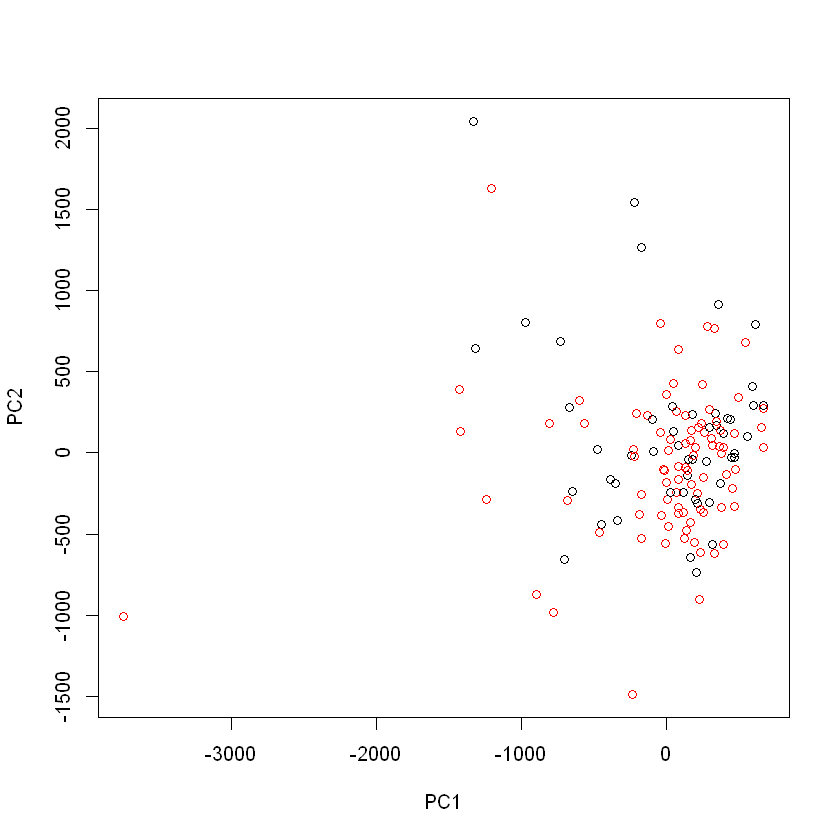

In [18]:
pca = prcomp(mc_red)
colors <- rep("black", 136)
colors[cd$SEX == 1] <- "red"
plot(pca$x[, 1:2], col=colors)

## Analyse de l'expression différentielle

In [19]:
#assoc_table va être une matrice ou on voit pour chaque variable quel cluster est différentiellement exprimé
row <- colnames(cd)[2:10]
row <- row[-6]

col <- colnames(mc[,2:65])
assoc_table <- data.frame(matrix(ncol = 64, nrow = 8))
colnames(assoc_table) <- col
rownames(assoc_table) <- row
assoc_table[,] <- FALSE
assoc_table

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SEX,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AGE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
HGHT,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
WGHT,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
BMI,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
COHORT,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRISCHD,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
DTHHRDY,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] "SEX"     "AGE"     "HGHT"    "WGHT"    "BMI"     "COHORT"  "TRISCHD"
[8] "DTHHRDY"

#### Sex

In [30]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ SEX)


converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function



In [31]:
# calcul des expressions différentielles
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 10 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [32]:
res <- results(dds)
#resultsNames(dds)
res
#summary(res)

log2 fold change (MLE): SEX 
Wald test p-value: SEX 
DataFrame with 65 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat    pvalue
                        <numeric>      <numeric> <numeric> <numeric> <numeric>
SMPLID                    72.9315       0.194895  0.214459  0.908775 0.3634688
Mophological.cluster.0   105.4915       0.393762  0.194342  2.026129 0.0427515
Mophological.cluster.1   103.7647       0.186659  0.230576  0.809532 0.4182090
Mophological.cluster.2   117.1776       0.169954  0.244563  0.694932 0.4870979
Mophological.cluster.3   125.2827       0.494131  0.226603  2.180605 0.0292126
...                           ...            ...       ...       ...       ...
Mophological.cluster.59   13.8445       0.200155  0.408155  0.490391 0.6238570
Mophological.cluster.60  126.7505       0.358392  0.194006  1.847322 0.0647004
Mophological.cluster.61  139.2785      -0.105043  0.275162 -0.381750 0.7026468
Mophological.cluster.62  152.6477       0

In [33]:
#pour voir le nombre de clusters pour lesquels la p-value est inférieure à 0.05
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)


FALSE  TRUE 
   58     7 

In [34]:
#Voir les 7 clusters avec la p-value ajustée en dessous de 0.05
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]


log2 fold change (MLE): SEX 
Wald test p-value: SEX 
DataFrame with 7 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.28  154.2311       0.611145  0.215170   2.84029
Mophological.cluster.29   71.3152       0.672496  0.225778   2.97857
Mophological.cluster.57  114.7111       0.944129  0.282605   3.34081
Mophological.cluster.18   79.0266       1.053219  0.268311   3.92537
Mophological.cluster.38   92.7315       1.073726  0.294151   3.65026
Mophological.cluster.42  108.5923       1.816410  0.393394   4.61728
Mophological.cluster.36  116.7020       2.803487  0.460504   6.08786
                             pvalue        padj
                          <numeric>   <numeric>
Mophological.cluster.28 4.50726e-03 4.05654e-02
Mophological.cluster.29 2.89600e-03 3.04080e-02
Mophological.cluster.57 8.35341e-04 1.05253e-02
Mophological.cluster.18 8.65981e-05 1.81856e-03
Mo

In [35]:
#on remplit la colonne SEX dans assoc_table
assoc_table["SEX",] <- colnames(assoc_table) %in% rownames(resSig)
print(assoc_table['SEX',])

    Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
SEX                  FALSE                  FALSE                  FALSE
    Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
SEX                  FALSE                  FALSE                  FALSE
    Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
SEX                  FALSE                  FALSE                  FALSE
    Mophological.cluster.9 Mophological.cluster.10 Mophological.cluster.11
SEX                  FALSE                   FALSE                   FALSE
    Mophological.cluster.12 Mophological.cluster.13 Mophological.cluster.14
SEX                   FALSE                   FALSE                   FALSE
    Mophological.cluster.15 Mophological.cluster.16 Mophological.cluster.17
SEX                   FALSE                   FALSE                   FALSE
    Mophological.cluster.18 Mophological.cluster.19 Mophological.cluster.20
SEX                    TRUE     

### Numerical variables

In [36]:
#fonction pour remplir la ligne du tableau 'assoc_table' associée avec une variable clinique numérique
num_dif_exp <- function(condition, assoc_table){
    cond <- as.formula(paste("~", condition))
    print(cond)
    dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = cond)
    dds <- DESeq(dds, quiet=TRUE)
    res <- results(dds)
    res.05 <- results(dds, alpha = 0.05)
    resSig <- subset(res, padj < 0.05)
    print(rownames(resSig))
    assoc_table[condition,] <<- colnames(assoc_table) %in% rownames(resSig)
}

In [37]:
for(variable in numerical_variables){
    num_dif_exp(variable, assoc_table)}

~AGE
<environment: 0x000000005923c7d8>


converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.



 [1] "Mophological.cluster.1"  "Mophological.cluster.2" 
 [3] "Mophological.cluster.4"  "Mophological.cluster.6" 
 [5] "Mophological.cluster.7"  "Mophological.cluster.10"
 [7] "Mophological.cluster.18" "Mophological.cluster.19"
 [9] "Mophological.cluster.25" "Mophological.cluster.27"
[11] "Mophological.cluster.29" "Mophological.cluster.38"
[13] "Mophological.cluster.40" "Mophological.cluster.44"
[15] "Mophological.cluster.48" "Mophological.cluster.50"
[17] "Mophological.cluster.56" "Mophological.cluster.59"
[19] "Mophological.cluster.60"
~HGHT
<environment: 0x000000005527e698>


converting counts to integer mode

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



[1] "Mophological.cluster.4"  "Mophological.cluster.18"
[3] "Mophological.cluster.46" "Mophological.cluster.50"
~WGHT
<environment: 0x0000000008da6870>


converting counts to integer mode

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.



[1] "Mophological.cluster.4"  "Mophological.cluster.14"
[3] "Mophological.cluster.15" "Mophological.cluster.35"
[5] "Mophological.cluster.46"
~BMI
<environment: 0x0000000008bbe9d0>


converting counts to integer mode

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.



character(0)
~TRISCHD
<environment: 0x0000000009d7c570>


converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.



 [1] "Mophological.cluster.0"  "Mophological.cluster.1" 
 [3] "Mophological.cluster.3"  "Mophological.cluster.4" 
 [5] "Mophological.cluster.5"  "Mophological.cluster.12"
 [7] "Mophological.cluster.14" "Mophological.cluster.15"
 [9] "Mophological.cluster.20" "Mophological.cluster.21"
[11] "Mophological.cluster.23" "Mophological.cluster.26"
[13] "Mophological.cluster.27" "Mophological.cluster.32"
[15] "Mophological.cluster.33" "Mophological.cluster.34"
[17] "Mophological.cluster.35" "Mophological.cluster.39"
[19] "Mophological.cluster.43" "Mophological.cluster.46"
[21] "Mophological.cluster.48" "Mophological.cluster.50"
[23] "Mophological.cluster.51" "Mophological.cluster.54"
[25] "Mophological.cluster.56" "Mophological.cluster.57"
[27] "Mophological.cluster.60" "Mophological.cluster.61"
[29] "Mophological.cluster.63"


#### Age

In [82]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE)


converting counts to integer mode



In [83]:
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept" "AGE"

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 65 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
SMPLID                    72.9315     -0.0638205 0.1033469 -0.617536
Mophological.cluster.0   105.4915      0.1156102 0.0943372  1.225499
Mophological.cluster.1   103.7647     -0.2699732 0.1093565 -2.468744
Mophological.cluster.2   117.1776      0.4557804 0.1131568  4.027866
Mophological.cluster.3   125.2827      0.0296187 0.1107491  0.267440
...                           ...            ...       ...       ...
Mophological.cluster.59   13.8445     -0.4766533 0.1929738 -2.470041
Mophological.cluster.60  126.7505      0.3471631 0.0907575  3.825170
Mophological.cluster.61  139.2785     -0.0480276 0.1325792 -0.362256
Mophological.cluster.62  152.6477     -0.2667380 0.1224516 -2.178314
Mophological.cluster.63  136.0940     -0.1649759 0.1449442 -1.138203
             


out of 65 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 29%
LFC < 0 (down)     : 8, 12%
outliers [1]       : 3, 4.6%
low counts [2]     : 0, 0%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [84]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_table


FALSE  TRUE 
   43    19 

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 19 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.10  124.4419      -0.509399 0.1066418  -4.77673
Mophological.cluster.59   13.8445      -0.476653 0.1929738  -2.47004
Mophological.cluster.25  130.5129      -0.341241 0.1060666  -3.21724
Mophological.cluster.6   191.6982      -0.300548 0.0816063  -3.68290
Mophological.cluster.1   103.7647      -0.269973 0.1093565  -2.46874
...                           ...            ...       ...       ...
Mophological.cluster.27   107.209       0.530725  0.142141   3.73380
Mophological.cluster.7     82.350       0.536899  0.126295   4.25116
Mophological.cluster.40   125.356       0.657209  0.166233   3.95354
Mophological.cluster.4    119.062       0.668394  0.163842   4.07949
Mophological.cluster.48    98.869       0.840589  0.156712   5.36390
             

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SEX,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AGE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
HGHT,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
WGHT,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
BMI,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
COHORT,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,...,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE
TRISCHD,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,...,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
DTHHRDY,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,...,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


Controle pour tmps ischémique et cohorte

In [85]:
dds_ctrl = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE + COHORT)
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept" "AGE"

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 65 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
SMPLID                    72.9315     -0.0638205 0.1033469 -0.617536
Mophological.cluster.0   105.4915      0.1156102 0.0943372  1.225499
Mophological.cluster.1   103.7647     -0.2699732 0.1093565 -2.468744
Mophological.cluster.2   117.1776      0.4557804 0.1131568  4.027866
Mophological.cluster.3   125.2827      0.0296187 0.1107491  0.267440
...                           ...            ...       ...       ...
Mophological.cluster.59   13.8445     -0.4766533 0.1929738 -2.470041
Mophological.cluster.60  126.7505      0.3471631 0.0907575  3.825170
Mophological.cluster.61  139.2785     -0.0480276 0.1325792 -0.362256
Mophological.cluster.62  152.6477     -0.2667380 0.1224516 -2.178314
Mophological.cluster.63  136.0940     -0.1649759 0.1449442 -1.138203
             


out of 65 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 29%
LFC < 0 (down)     : 8, 12%
outliers [1]       : 3, 4.6%
low counts [2]     : 0, 0%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [86]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_table


FALSE  TRUE 
   43    19 

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 19 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.10  124.4419      -0.509399 0.1066418  -4.77673
Mophological.cluster.59   13.8445      -0.476653 0.1929738  -2.47004
Mophological.cluster.25  130.5129      -0.341241 0.1060666  -3.21724
Mophological.cluster.6   191.6982      -0.300548 0.0816063  -3.68290
Mophological.cluster.1   103.7647      -0.269973 0.1093565  -2.46874
...                           ...            ...       ...       ...
Mophological.cluster.27   107.209       0.530725  0.142141   3.73380
Mophological.cluster.7     82.350       0.536899  0.126295   4.25116
Mophological.cluster.40   125.356       0.657209  0.166233   3.95354
Mophological.cluster.4    119.062       0.668394  0.163842   4.07949
Mophological.cluster.48    98.869       0.840589  0.156712   5.36390
             

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SEX,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AGE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
HGHT,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
WGHT,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
BMI,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
COHORT,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,...,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE
TRISCHD,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,...,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
DTHHRDY,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,...,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


#### Hardy

In [70]:
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="2"] <-"1"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="3"] <-"0"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="4"] <-"0"
print (cd$DTHHRDY)

  [1] 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 [75] 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[112] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
Levels: 0 1


In [71]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ DTHHRDY)
dds <- DESeq(dds)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table["DTHHRDY",] <- colnames(assoc_table) %in% rownames(resSig)
print(assoc_table['DTHHRDY',])

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 6 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




FALSE  TRUE 
   31    34 

log2 fold change (MLE): DTHHRDY 1 vs 0 
Wald test p-value: DTHHRDY 1 vs 0 
DataFrame with 34 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.54   97.8073       -1.51564  0.420892  -3.60101
Mophological.cluster.35  151.3552       -1.51432  0.348407  -4.34641
Mophological.cluster.47   98.4274       -1.43322  0.347067  -4.12953
Mophological.cluster.52  105.0531       -1.29580  0.356345  -3.63636
Mophological.cluster.5   185.3321       -1.05247  0.268437  -3.92073
...                           ...            ...       ...       ...
Mophological.cluster.57  114.7111        2.23873  0.311562   7.18551
Mophological.cluster.48   98.8690        2.30009  0.389170   5.91025
Mophological.cluster.39  101.1782        2.36441  0.451620   5.23538
Mophological.cluster.26   83.3441        3.27031  0.458511   7.13245
Mophological.cluster.12  103.7865        4.47236  0.548357  

        Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
DTHHRDY                   TRUE                  FALSE                   TRUE
        Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
DTHHRDY                   TRUE                   TRUE                   TRUE
        Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
DTHHRDY                   TRUE                  FALSE                  FALSE
        Mophological.cluster.9 Mophological.cluster.10 Mophological.cluster.11
DTHHRDY                   TRUE                   FALSE                   FALSE
        Mophological.cluster.12 Mophological.cluster.13 Mophological.cluster.14
DTHHRDY                    TRUE                   FALSE                   FALSE
        Mophological.cluster.15 Mophological.cluster.16 Mophological.cluster.17
DTHHRDY                    TRUE                    TRUE                    TRUE
        Mophological.cluster.18 Mophological.cluster.19 Moph

In [73]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ COHORT)
dds <- DESeq(dds)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table["COHORT",] <- colnames(assoc_table) %in% rownames(resSig)
print(assoc_table['COHORT',])

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R.


FALSE  TRUE 
   28    37 

log2 fold change (MLE): COHORT Postmortem vs Organ.Donor..OPO. 
Wald test p-value: COHORT Postmortem vs Organ.Donor..OPO. 
DataFrame with 37 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.45   14.1828       -3.51314  1.378862  -2.54785
Mophological.cluster.54   92.6981       -2.22711  0.348743  -6.38610
Mophological.cluster.35  151.3552       -2.00775  0.291295  -6.89249
Mophological.cluster.52  105.0531       -1.45512  0.307200  -4.73672
Mophological.cluster.23  135.7531       -1.39890  0.284017  -4.92540
...                           ...            ...       ...       ...
Mophological.cluster.4   119.0621        2.17421  0.348618   6.23667
Mophological.cluster.57  114.7111        2.35660  0.257453   9.15354
Mophological.cluster.48   98.8690        2.55365  0.322175   7.92627
Mophological.cluster.26   83.3441        3.21444  0.397512   8.08641
Mophological

       Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
COHORT                   TRUE                  FALSE                   TRUE
       Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
COHORT                   TRUE                   TRUE                   TRUE
       Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
COHORT                   TRUE                  FALSE                  FALSE
       Mophological.cluster.9 Mophological.cluster.10 Mophological.cluster.11
COHORT                  FALSE                    TRUE                   FALSE
       Mophological.cluster.12 Mophological.cluster.13 Mophological.cluster.14
COHORT                    TRUE                   FALSE                   FALSE
       Mophological.cluster.15 Mophological.cluster.16 Mophological.cluster.17
COHORT                    TRUE                    TRUE                    TRUE
       Mophological.cluster.18 Mophological.cluster.19 Mophological.clus

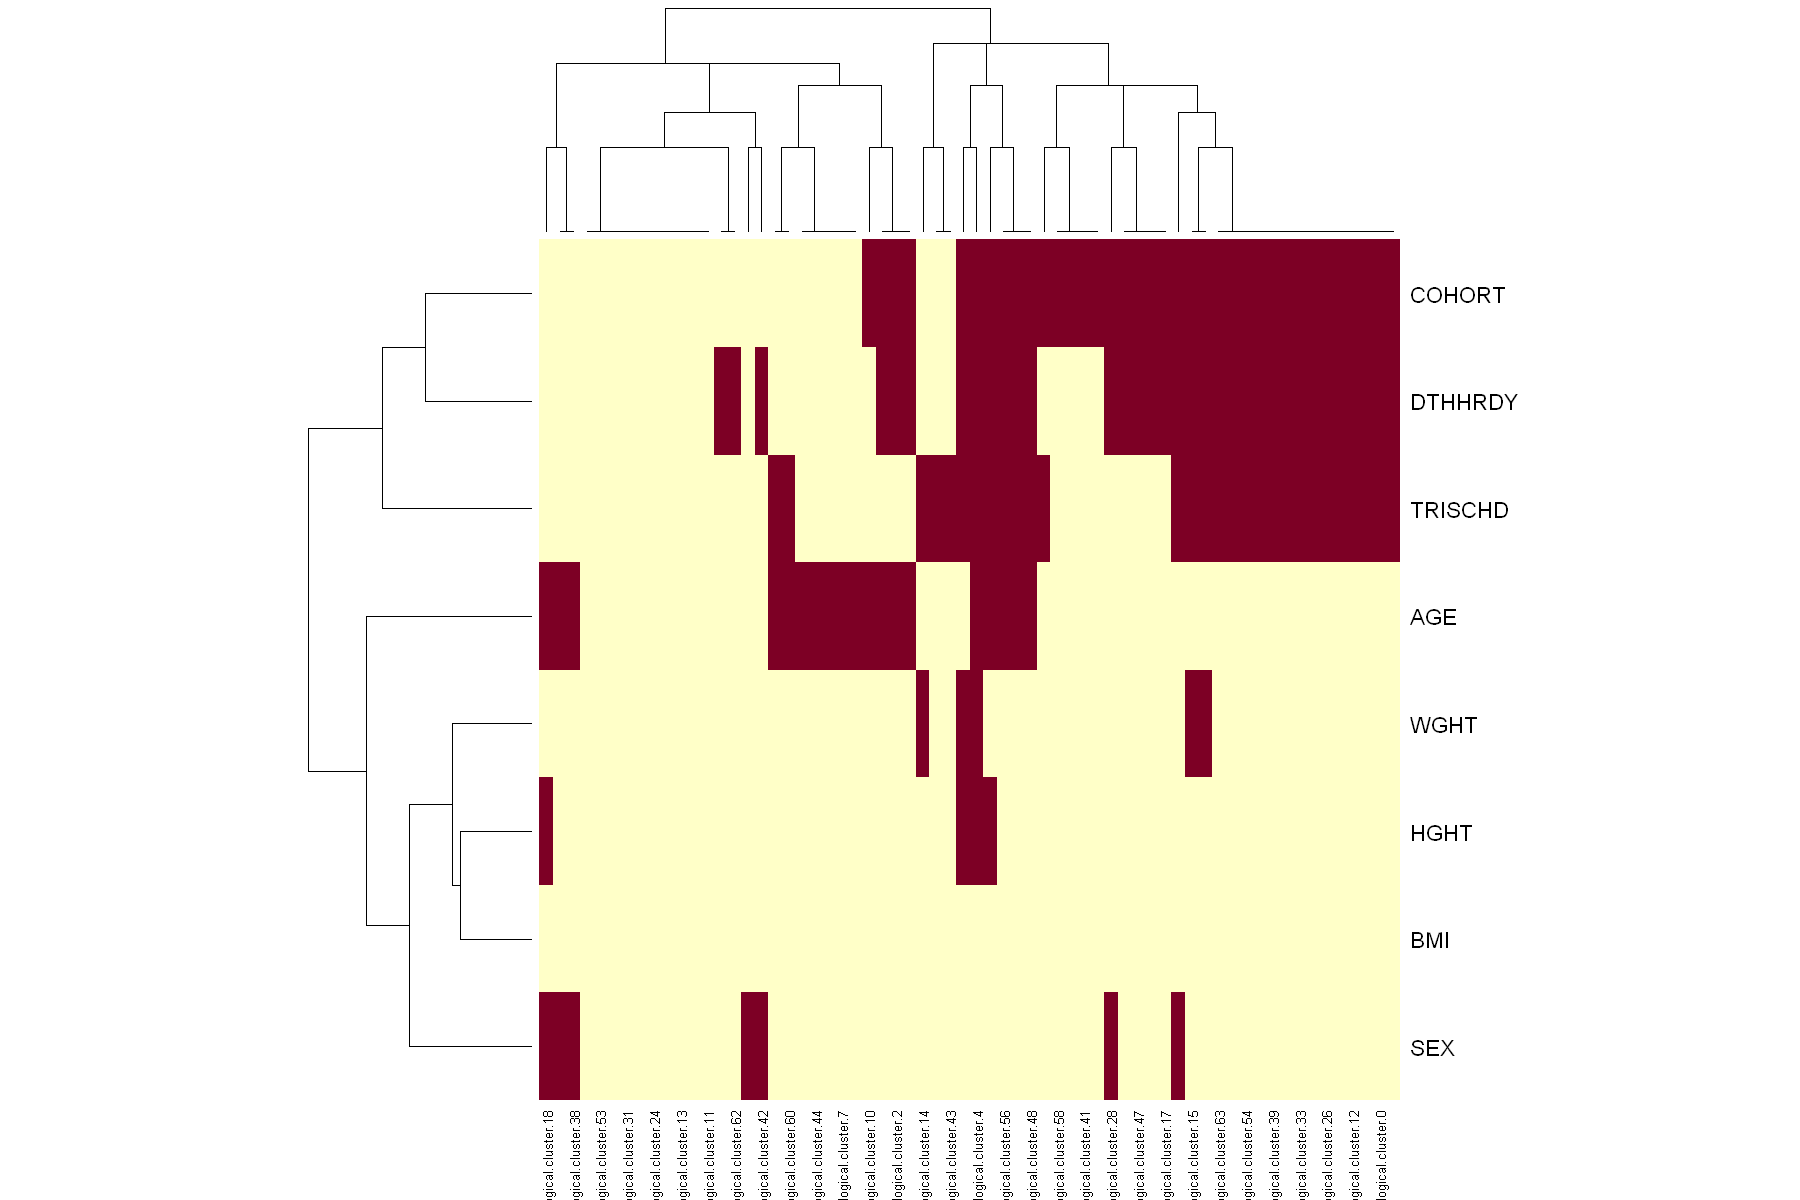

In [74]:
options(repr.plot.width=15, repr.plot.height=10)
heatmap(data.matrix(assoc_table), scale='none')